In [ ]:
# !cd job_dashboard/
# !pwd

/workspace


In [33]:
import os, json
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

# os.chdir("job_dashboard/")

print(os.getcwd())

df = pd.read_csv("jobs.csv")

print(df.columns)

COLS = ["title","site","company","company_industry","location","salary_source","date_posted","description","job_type","job_url_direct"]

df = df[COLS]

print(len(df))
df.head()

/home/caio/job_dashboard
Index(['id', 'site', 'job_url', 'job_url_direct', 'title', 'company',
       'location', 'date_posted', 'job_type', 'salary_source', 'interval',
       'min_amount', 'max_amount', 'currency', 'is_remote', 'job_level',
       'job_function', 'listing_type', 'emails', 'description',
       'company_industry', 'company_url', 'company_logo', 'company_url_direct',
       'company_addresses', 'company_num_employees', 'company_revenue',
       'company_description', 'skills', 'experience_range', 'company_rating',
       'company_reviews_count', 'vacancy_count', 'work_from_home_type'],
      dtype='object')
754


,title,site,company,company_industry,location,salary_source,date_posted,description,job_type,job_url_direct
0,Sr Data Scientist,indeed,Ria Money Transfer,NaN,"Barueri, SP, BR",NaN,2026-02-23,"**Description**\n\n\nRia Money Transfer, a bus...",fulltime,https://careers.riamoneytransfer.com/jobs/1738...
1,Interns (voluntary Internship) - Studentjob.ch,linkedin,Jobster,NaN,"Campinas, São Paulo, Brazil",NaN,2026-02-23,NaN,NaN,NaN
2,Software Volume Tester (SVT Engineer),linkedin,Netcracker Technology,NaN,"Campinas, São Paulo, Brazil",NaN,2026-02-23,NaN,NaN,NaN
3,Cientista de dados Pleno,linkedin,Cielo,NaN,"Barueri, São Paulo, Brazil",NaN,2026-02-22,NaN,NaN,NaN
4,"Retail Data Analyst - Hybrid: Sao Paulo City, ...",linkedin,Circana,NaN,"Várzea Paulista, São Paulo, Brazil",NaN,2026-02-22,NaN,NaN,NaN


In [2]:
df['job_type'].unique(), df['company_industry'].unique()

(array(['fulltime', nan, 'parttime'], dtype=object),
 array([nan, 'Agriculture And Extraction', 'Industrial Manufacturing',
        'Energy And Utilities'], dtype=object))

In [2]:
# !pip install ollama
# !pip install --upgrade typing_extensions

<Axes: xlabel='location'>

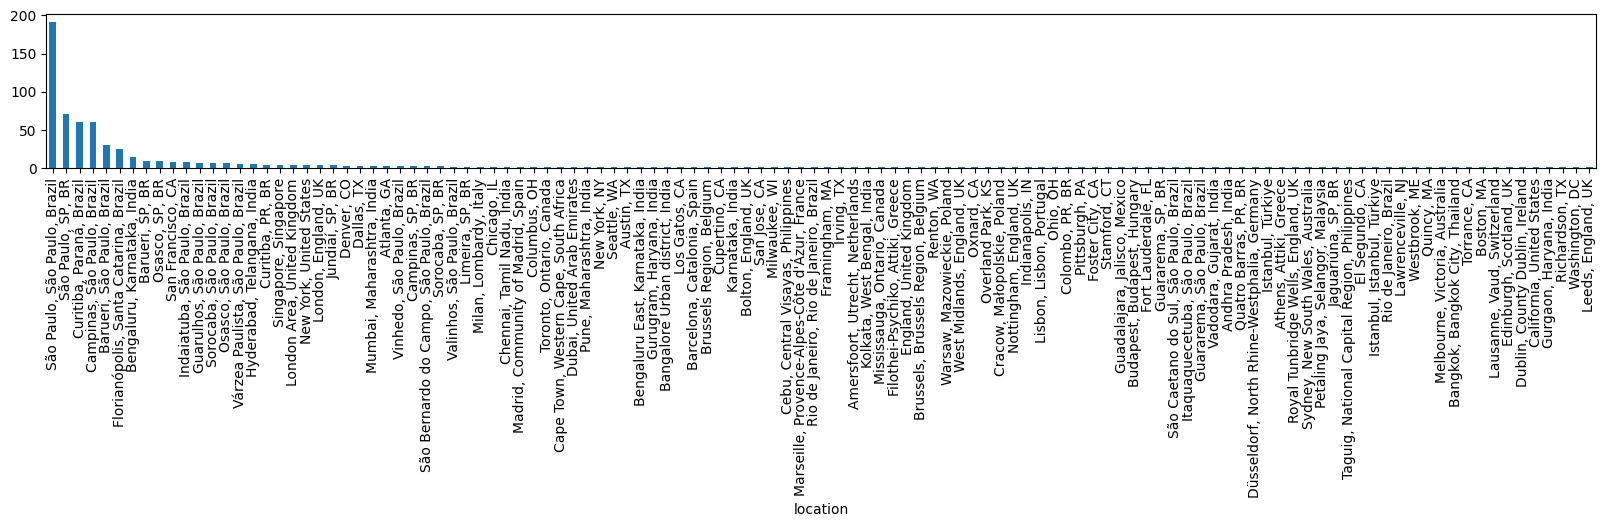

In [3]:
jobs_per_loc = df["location"].value_counts()

jobs_per_loc.plot(kind="bar", figsize=(20,2))

In [4]:
locs_15 = jobs_per_loc[(jobs_per_loc > 15)].index # mais de 15 vagas

df = df.loc[df["location"].isin(locs_15)]

len(df)

438

In [5]:
import re, json

with open("skills.json","r") as f:
    skills = json.load(f)

print(f"Total skills: {len(skills)}")

match_pattern = r'\b(?:' + '|'.join(re.escape(word) for word in skills) + r')\b'

def extract_words(text):
    try:
        if not isinstance(text, str):
            text = str(text) if text is not None else ""
        
        return re.findall(match_pattern, text, re.IGNORECASE)
    except Exception as e:
        print(e)
        return None


df["tech_skills"] = df["description"].apply(lambda x: extract_words(x))

df["tech_skills"].head()

Total skills: 73


1    []
2    []
3    []
5    []
6    []
Name: tech_skills, dtype: object

In [6]:
df = df.loc[df["tech_skills"].apply(len) > 0].reset_index(drop=True)

df.head()

,title,site,company,company_industry,location,salary_source,date_posted,description,job_type,job_url_direct,tech_skills
0,LATAM Risk&AI Manager,indeed,Feedzai,NaN,"São Paulo, SP, BR",NaN,2026-02-23,Feedzai is the world's first RiskOps platform ...,NaN,https://grnh.se/izpma6uw1us,[Python]
1,Cientista de Dados SR,indeed,AXIA Energia,NaN,"São Paulo, SP, BR",NaN,2026-02-24,SOBRE A AXIA ENERGIA\n\n \n\n\n\nA Eletrobras...,NaN,https://axiaenergia.gupy.io/job/eyJqb2JJZCI6MT...,"[Python, pandas, numpy, SQL]"
2,Especialista de Business Analytics,indeed,AXIA Energia,NaN,"São Paulo, SP, BR",NaN,2026-02-24,SOBRE A AXIA ENERGIA\n\n \n\n\n\nA Eletrobras...,NaN,https://axiaenergia.gupy.io/job/eyJqb2JJZCI6MT...,[Python]
3,Senior Developer GenAI,indeed,Cognizant Technology Solutions,NaN,"São Paulo, SP, BR",NaN,2026-02-23,**1\\.Job Title :** \n\nSR. DEVELOPER\n \n ...,fulltime,https://click.appcast.io/t/TNxMa1Vl7f4N177LurK...,"[Kubernetes, Docker, AWS, Terraform]"
4,Analista de Segurança da Informação Sênior,indeed,MaisTODOS,NaN,"São Paulo, SP, BR",NaN,2026-02-23,#### **Responsabilidades**\n\n\n* **Arquitetur...,NaN,https://jobs.recrutei.com.br/maistodos/vacancy...,"[AWS, AWS, AWS, AWS, AWS, Azure, GCP, AWS, Azu..."


<Axes: xlabel='skill'>

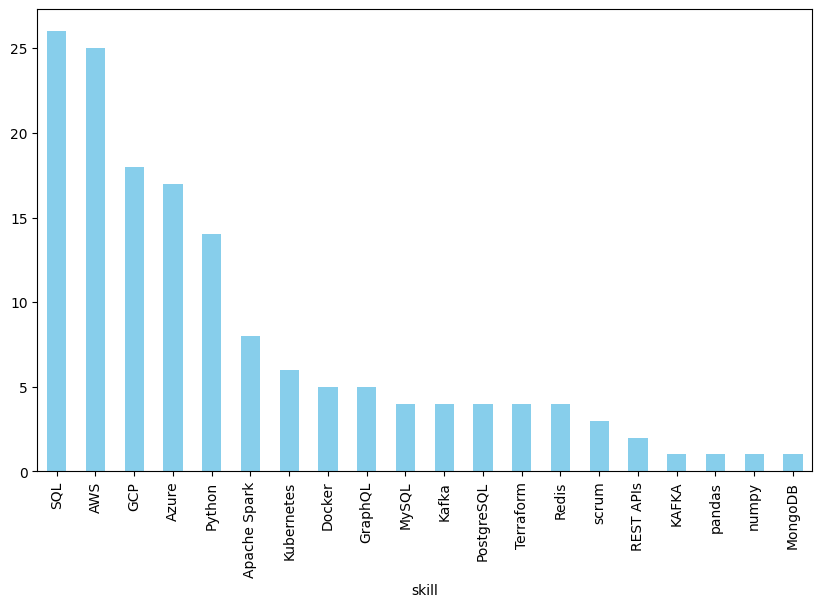

In [7]:
def count_skills(df):

    dfex = df['tech_skills'].apply(lambda x: list(set(x)) if isinstance(x, list) else []).explode()

    df_counts = dfex.value_counts().reset_index()

    df_counts.columns = ['skill', 'total']

    return df_counts

skill_counts = count_skills(df)

skill_counts.set_index('skill')['total'].plot(kind='bar', figsize=(10, 6), color='skyblue')

In [31]:
def check_description(df, skill):

    display( 
        df.loc[df["tech_skills"]
               .apply(lambda skills: skill in skills)]
               .sample(1, random_state=1)["description"]
               .tolist()[0].split("\n") 
    )

check_description(df, "GCP")

['Analista de Desenvolvimento de Software Junior',
 '',
 '',
 'Full\\\\-time',
 'Employee Status: Regular',
 'Role Type: Hybrid',
 'Department: Technology',
 'Schedule: Full Time',
 '**Company Description**',
 '-----------------------',
 '',
 '',
 'A Serasa Experian é a primeira e a maior Datatech do Brasil. Líder em soluções de inteligência para análise de riscos e oportunidades, com foco nas jornadas de crédito, autenticação e prevenção à fraude. Com tecnologia de ponta, inovação e os melhores talentos, transforma a incerteza do risco na melhor decisão, ajudando pessoas a realizarem seus sonhos e empresas de todos os portes e segmentos a prosperarem.',
 '',
 '',
 'Temos 22\\\\.000 pessoas operando em 32 países e a cada dia estamos investindo em novas tecnologias, profissionais talentosos e inovação para ajudar todos os clientes a maximizarem cada oportunidade. Com sede corporativa em Dublin, Irlanda, a Experian está listada na Bolsa de Valores de Londres (EXPN) e compõe o índice FTSE